# Inverse distance weighting - Meuse Dataset

https://pareekshithkatti.medium.com/inverse-distance-weighting-interpolation-in-python-68351fb612d2

Python package: https://github.com/yahyatamim/pyidw

IDW based on paper: https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/9_Inverse_distance_weighting.ipynb#scrollTo=yM5SAdS8Sunj

IDW with youtube video:
https://github.com/adenarayana/Python-Matplotlib/blob/main/008_IDWInterpolation/008_IDWInterpolation.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
meuse_df = pd.read_csv("meuse_processed.csv")

In [5]:
display(meuse_df)

x       y   cadmium    copper      lead      zinc   elev      dist  \
0    181072  333611  2.459589  4.442651  5.700444  6.929517  7.909  0.001358   
1    181025  333558  2.151762  4.394449  5.624018  7.039660  6.983  0.012224   
2    181165  333537  1.871802  4.219508  5.293305  6.461468  7.800  0.103029   
3    181298  333484  0.955511  4.394449  4.753590  5.549076  7.655  0.190094   
4    181307  333330  1.029619  3.871201  4.762174  5.594711  7.480  0.277090   
..      ...     ...       ...       ...       ...       ...    ...       ...   
150  179184  330182 -0.223144  2.995732  3.891820  5.111988  8.128  0.423837   
151  179085  330292  1.131402  3.663562  5.153292  6.206576  8.577  0.423837   
152  178875  330311  0.741937  3.433987  4.779123  5.834811  8.429  0.277090   
153  179466  330381 -0.223144  3.044522  3.931826  5.087596  9.406  0.358606   
154  180627  330190  0.993252  3.295837  4.820282  5.926926  8.261  0.012224   

       om  ffreq  soil  lime landuse  dist.m  
0    13.6      1     1     1      Ah      50  
1    14.0      1     1     1      Ah      30  
2    13.0      1     1     1      Ah     150  
3     8.0      1     2     0      Ga     270  
4     8.7      1     2     0      Ah     380  
..    ...    ...   ...   ...     ...     ...  
150   4.7      3     1     0      Am     540  
151   9.1      3     1     0      Ah     520  
152   6.5      3     1     0      Ah     350  
153   5.7      3     1     0       W     460  
154   5.5      3     3     0       W      40  

[155 rows x 14 columns]

In [6]:
interpolate_data = pd.DataFrame({
    'x': meuse_df['x'],
    'y': meuse_df['y']
})

In [7]:
# Calculate Euclidean distance between two points
def distance(x1, x2, y2, y1):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [8]:
type(interpolate_data['x'][0])

numpy.int64

In [9]:
# list of velocity from IDW
vIDW = []

for i in range(len(interpolate_data)):
    
    #=========get the distance: the closest 5 points=========#
    
    nPoints = 5 # number of points
    dList = []
    
    for j in range(len(meuse_df)):
        dist = distance(interpolate_data['x'][i], meuse_df['x'][j], interpolate_data['y'][i], meuse_df['y'][j])
        dList.append(dist) 
        
    dListDF = pd.Series(dList)
    dListDF.sort_values(ascending=True, inplace=True)
    dListDF = dListDF[0:nPoints]
    
    #=========check the distance=========#
    
    if dListDF.iloc[0] <= 1: # if the distance from interpolation point less than equal to 1 meter
        
        vIDW.append(meuse_df['mag'][dListDF.index.values[0]])
        
    else:    
    #=========IDW=========#    
        
        # get the velocity data: the closest 5 data
        
        vZinc = []
        for idx in dListDF.index.values:
            vZinc.append(meuse_df['zinc'][idx])
        vZinc = np.array(vZinc)

        # weight calculation
        
        p = 2                     # power parameter
        wList = []
        for d in dListDF:
            wList.append(1/d**p) 
        wList = np.array(wList)

        # IDW
        
        vIDW.append(np.dot(vZinc,np.transpose(wList))/np.sum(wList)) 

# final result
vIDW = np.array(vIDW)

In [10]:
vIDW

array([6.92705104, 5.08837336, 5.78798962])

InvalidIndexError: (slice(None, None, None), 0)

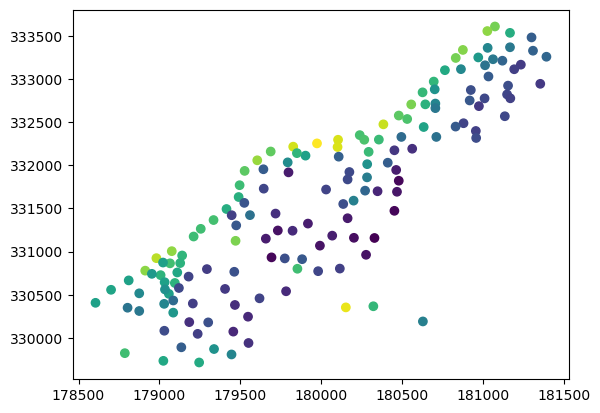

In [11]:
# Plotting for visualization
plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', label='Observed')
plt.scatter(interpolate_data[:, 0], interpolate_data[:, 1], c=vIDW[:, 0], cmap='viridis', marker='x', s=100, label='Interpolated')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

In [22]:
i = 0 # 
nPoints = 5 # number of points
dList = []

for j in range(len(meuse_df)):
    dList.append(distance(interpolate_data['x'][i], 
                          meuse_df['x'][j],
                          interpolate_data['y'][i], 
                          meuse_df['y'][j])) 

dListDF = pd.Series(dList)
dListDF.sort_values(ascending=True, inplace=True)
dListDF = dListDF[0:nPoints]


In [23]:
dListDF

0      7.280110
1     77.466122
2    121.827747
7    259.295199
3    261.021072
dtype: float64

In [24]:
meuse_df.iloc[dListDF.index.values]

x       y  cadmium  copper  lead  zinc   elev      dist    om  ffreq  \
0  181072  333611     11.7      85   299  1022  7.909  0.001358  13.6      1   
1  181025  333558      8.6      81   277  1141  6.983  0.012224  14.0      1   
2  181165  333537      6.5      68   199   640  7.800  0.103029  13.0      1   
7  181027  333363      2.8      29   150   406  8.490  0.092152   9.5      1   
3  181298  333484      2.6      81   116   257  7.655  0.190094   8.0      1   

   soil  lime landuse  dist.m  
0     1     1      Ah      50  
1     1     1      Ah      30  
2     1     1      Ah     150  
7     1     0      Ab     120  
3     2     0      Ga     270

In [25]:
if dListDF.iloc[0] <= 1: # if the distance from interpolation point less than equal to 1 meter

    meuse_df['zinc'][dListDF.index.values[0]]
    print(True)

else:
    
    print(False)

False


In [27]:
#=========IDW=========#    

# get the velocity data: the closest 5 data

vZinc = []
for idx in dListDF.index.values:
    vZinc.append(meuse_df['zinc'][idx])
vZinc = np.array(vZinc)

# weight calculation

p = 2                     # power parameter
wList = []
for d in dListDF:
    wList.append(1/d**p) 
wList = np.array(wList)

# IDW

np.dot(vZinc,np.transpose(wList))/np.sum(wList)

1020.6254088301395

In [20]:
import numpy as np

def inverse_distance_weighting(x, y, z, x_new, y_new, power=2):
    """
    Perform Inverse Distance Weighting interpolation.

    Parameters:
    - x: array of x-coordinates of the known points.
    - y: array of y-coordinates of the known points.
    - z: array of values at the known points.
    - x_new: x-coordinate of the point for which to estimate the value.
    - y_new: y-coordinate of the point for which to estimate the value.
    - power: power parameter that controls the influence of distance on the interpolation. Higher values give more influence to closer points.

    Returns:
    - Estimated value at (x_new, y_new).
    """
    distances = np.sqrt((x - x_new)**2 + (y - y_new)**2)
    # Prevent division by zero for points exactly at the location of interest
    distances = np.where(distances == 0, 1e-10, distances)
    weights = 1 / distances**power
    weighted_sum = np.sum(weights * z)
    sum_of_weights = np.sum(weights)
    z_new = weighted_sum / sum_of_weights
    return z_new

# Example usage
x = meuse_df['x']  # x-coordinates of known points
y = meuse_df['y']  # y-coordinates of known points
z = meuse_df['zinc'] # Values at known points

for idx in range(len(interpolate_data['x'])):
    x_new = interpolate_data['x'][idx]  # x-coordinate of the point for estimation
    y_new = interpolate_data['y'][idx] # y-coordinate of the point for estimation

    # Estimate value at new point
    z_new = inverse_distance_weighting(x, y, z, x_new, y_new, power=2)
    print(f"Estimated value at ({x_new}, {y_new}): {z_new}")


Estimated value at (181074, 333618): 6.9204491382885305
Estimated value at (179463, 330389): 5.099597202772105
Estimated value at (182080, 333718): 5.878118963592749
